In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Data exploration

#Read the data
data = pd.read_csv('BankLoanApproval.csv')
print(data.head(3))

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  IA35XVH6ZO   28  140466      163781          652              94   
1  Y8UETC3LSG   28  149227      139759          375              56   
2  RM6QSRHIYP   41   23265       63527          829              87   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               2          9.08        48      0.23  High School   
1               3          5.84        36      0.80          PhD   
2               4          9.73        60      0.45     Master's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0     Unemployed       Married          No            No   Education   
1      Full-time      Divorced          No            No   Education   
2      Full-time      Divorced         Yes            No        Auto   

  HasCoSigner  Default  
0          No        0  
1         Yes        1  
2         Yes        0  


# Data preparation

In [4]:
data.columns #Show names of all the columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [5]:
data.info()  #Check information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255327 entries, 0 to 255326
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255327 non-null  object 
 1   Age             255327 non-null  int64  
 2   Income          255327 non-null  int64  
 3   LoanAmount      255327 non-null  int64  
 4   CreditScore     255327 non-null  int64  
 5   MonthsEmployed  255327 non-null  int64  
 6   NumCreditLines  255327 non-null  int64  
 7   InterestRate    255327 non-null  float64
 8   LoanTerm        255327 non-null  int64  
 9   DTIRatio        255327 non-null  float64
 10  Education       255327 non-null  object 
 11  EmploymentType  255327 non-null  object 
 12  MaritalStatus   255327 non-null  object 
 13  HasMortgage     255327 non-null  object 
 14  HasDependents   255327 non-null  object 
 15  LoanPurpose     255327 non-null  object 
 16  HasCoSigner     255327 non-null  object 
 17  Default   

In [6]:
data.describe().T #Show descriptive statistics

,count,mean,std,min,25%,50%,75%,max
Age,255327.0,43.498059,14.990304,18.0,31.00,43.00,56.00,69.0
Income,255327.0,82500.225585,38963.150663,15000.0,48826.00,82467.00,116219.00,149999.0
LoanAmount,255327.0,127579.236559,70841.308245,5000.0,66156.00,127557.00,188986.50,249999.0
CreditScore,255327.0,574.266125,158.904496,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255327.0,59.542516,34.643129,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255327.0,2.501036,1.117021,1.0,2.00,2.00,3.00,4.0
InterestRate,255327.0,13.492848,6.636456,2.0,7.77,13.46,19.25,25.0
LoanTerm,255327.0,36.025896,16.969297,12.0,24.00,36.00,48.00,60.0
DTIRatio,255327.0,0.500222,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255327.0,0.116118,0.320367,0.0,0.00,0.00,0.00,1.0


In [7]:
data.shape #Check number of rows and columns

(255327, 18)

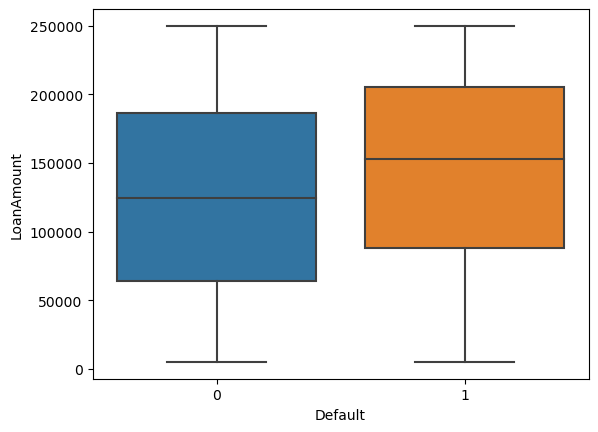

In [8]:
#Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x = "Default", y = "LoanAmount", data=data)
plt.show()

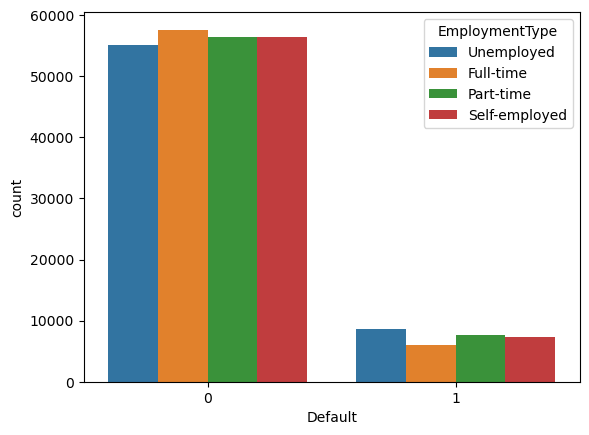

In [9]:
sns.countplot(x = "Default", data = data, hue = "EmploymentType")
plt.show()

In [10]:
#Exploratory data analysis
#Check for unique value of each categories in the columns
print("Education:",data['Education'].unique())
print("Employment Type: ",data['EmploymentType'].unique())
print("Marital Status: ",data['MaritalStatus'].unique())
print("Loan Purpose: ",data['LoanPurpose'].unique())

Education: ['High School' 'PhD' "Master's" "Bachelor's"]
Employment Type:  ['Unemployed' 'Full-time' 'Part-time' 'Self-employed']
Marital Status:  ['Married' 'Divorced' 'Single']
Loan Purpose:  ['Education' 'Auto' 'Home' 'Other' 'Business']


In [11]:
#Check for numbers of unique value of each categories in the column
print("Education:",data['Education'].nunique())
print("Employment Type: ",data['EmploymentType'].nunique())
print("Marital Status: ",data['MaritalStatus'].nunique())
print("Loan Purpose: ",data['LoanPurpose'].nunique())

Education: 4
Employment Type:  4
Marital Status:  3
Loan Purpose:  5


In [12]:
#Show the count of unique values
print("Education:",data['Education'].value_counts(),"\n")
print("Employment Type: ",data['EmploymentType'].value_counts(),"\n")
print("Marital Status: ",data['MaritalStatus'].value_counts(),"\n")
print("Loan Purpose: ",data['LoanPurpose'].value_counts(),"\n")

Education: Education
Bachelor's     64360
High School    63895
Master's       63538
PhD            63534
Name: count, dtype: int64 

Employment Type:  EmploymentType
Part-time        64156
Unemployed       63819
Self-employed    63702
Full-time        63650
Name: count, dtype: int64 

Marital Status:  MaritalStatus
Married     85295
Divorced    85024
Single      85008
Name: count, dtype: int64 

Loan Purpose:  LoanPurpose
Business     51296
Home         51280
Education    51002
Other        50909
Auto         50840
Name: count, dtype: int64 



In [13]:
#Data splitting
#delete unused column
data.drop(['LoanID'], axis = 1 ,inplace = True)

In [14]:
#Separate the data into features(X) and target(y)
X = data.drop('Default', axis=1)
y = data['Default']

#Handle categorical data
categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
categorical_data = pd.get_dummies(data[categorical_columns], drop_first=True)

#Drop extra columns
X = X.drop(categorical_columns, axis=1)

#Concatenation of independent variables and new categorical variables
X = pd.concat([X, categorical_data], axis=1)

X

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_High School,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,28,140466,163781,652,94,2,9.08,48,0.23,True,...,True,True,False,False,False,False,True,False,False,False
1,28,149227,139759,375,56,3,5.84,36,0.80,False,...,False,False,False,False,False,False,True,False,False,True
2,41,23265,63527,829,87,4,9.73,60,0.45,False,...,False,False,False,True,False,False,False,False,False,True
3,53,117550,95744,395,112,4,3.58,24,0.73,True,...,True,False,True,False,False,False,False,False,False,True
4,57,139699,88143,635,112,4,5.63,48,0.20,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255322,67,76558,122456,734,90,2,14.30,60,0.53,False,...,False,False,True,False,False,False,False,False,True,True
255323,22,45575,43355,545,99,1,21.86,12,0.52,False,...,True,True,False,True,True,False,True,False,False,False
255324,69,34859,105905,715,25,2,20.28,48,0.35,False,...,False,False,False,False,True,True,False,False,False,False
255325,41,124446,249800,650,60,4,3.32,24,0.21,True,...,True,False,True,True,False,False,False,False,True,False


In [15]:
#Check data types of X
X.dtypes

Age                               int64
Income                            int64
LoanAmount                        int64
CreditScore                       int64
MonthsEmployed                    int64
NumCreditLines                    int64
InterestRate                    float64
LoanTerm                          int64
DTIRatio                        float64
Education_High School              bool
Education_Master's                 bool
Education_PhD                      bool
EmploymentType_Part-time           bool
EmploymentType_Self-employed       bool
EmploymentType_Unemployed          bool
MaritalStatus_Married              bool
MaritalStatus_Single               bool
HasMortgage_Yes                    bool
HasDependents_Yes                  bool
LoanPurpose_Business               bool
LoanPurpose_Education              bool
LoanPurpose_Home                   bool
LoanPurpose_Other                  bool
HasCoSigner_Yes                    bool
dtype: object

In [16]:
#Data is splitted into validation, training and test sets
from sklearn.model_selection import train_test_split

#70% for training set while 30% for testing and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

#10% for validation set while 20% for testing set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.67, random_state=42)

from sklearn.preprocessing import StandardScaler

#Scale the features using StandardScalar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

#Determine the shape of X-train, X_test and X_val
print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Testing set size:", X_test.shape)

Training set size: (178728, 24)
Validation set size: (25277, 24)
Testing set size: (51322, 24)


In [17]:
#Data preprocessing
#Check whether any missing values exist by converting X_train to a DataFrame
X_train_df = pd.DataFrame(X_train)
X_train_df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
dtype: int64

In [18]:
#check whether any duplicate entries exist
X_train_df.duplicated().any()

False

In [19]:
#Check duplicate rows
duplicate_rows = X_train_df[X_train_df.duplicated()]
print("Number of duplicate rows : ", duplicate_rows.shape)

#Remove duplicate row
data = X_train_df.drop_duplicates()
duplicate_rows = X_train_df[X_train_df.duplicated()]
print("Number of duplicate rows : ", duplicate_rows.shape)

Number of duplicate rows :  (0, 24)
Number of duplicate rows :  (0, 24)


In [20]:
import numpy as np
from scipy import stats

#Calculate Z-scores to check and remove outliers
z_numerical = np.abs(stats.zscore(X_train))
data3 = X_train_df[(z_numerical < 3).all(axis = 1)]
print(data3.shape)

(178728, 24)


Text(0.5, 1.0, 'Pearson Correlation')

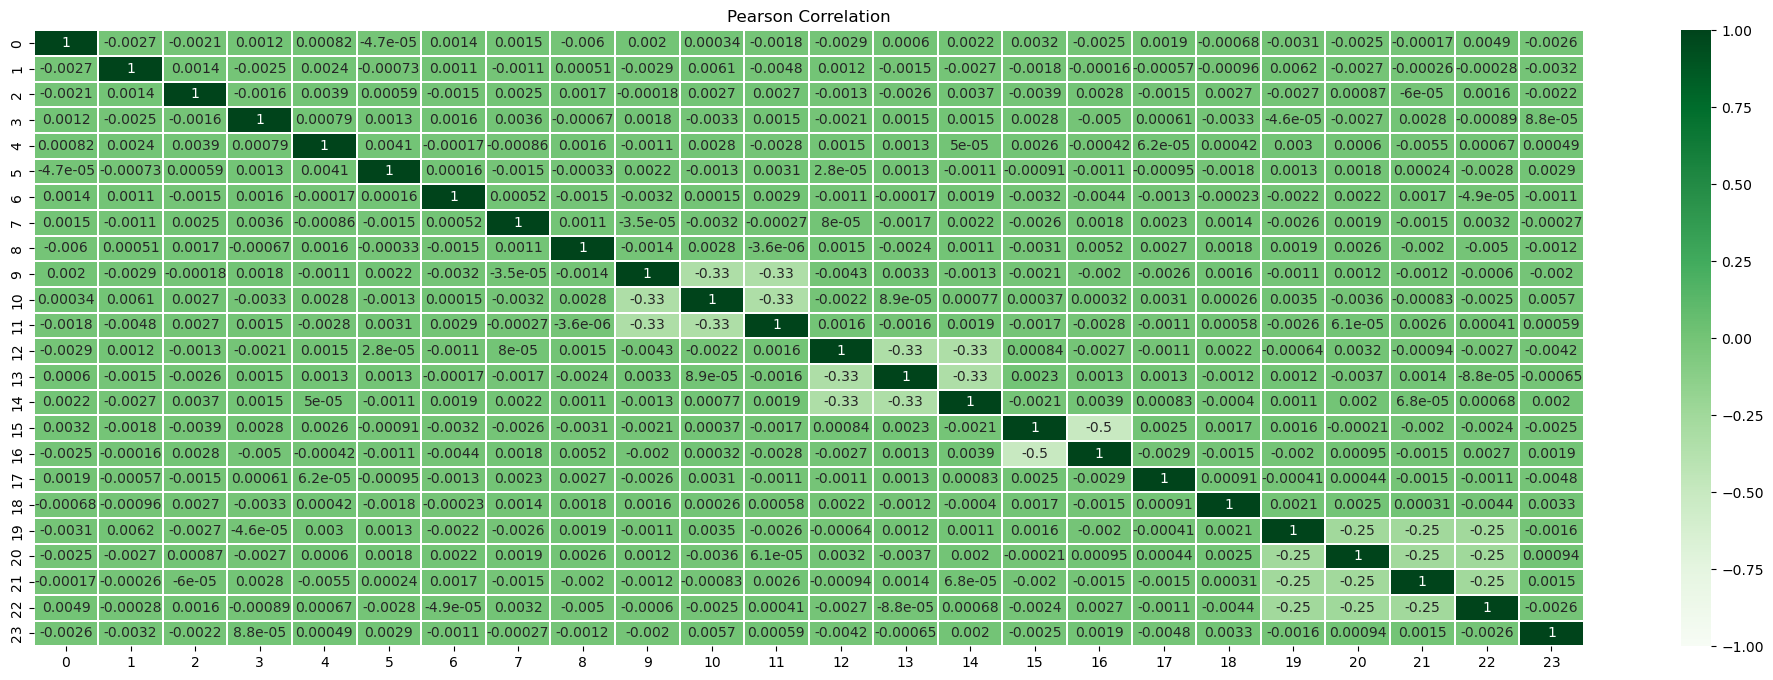

In [21]:
#Find correlation between variables
pearsonCorr = data3.corr(method = 'pearson')
spearmanCorr = data3.corr(method = 'spearman')
fig = plt.subplots(figsize = (25,8))
sns.heatmap(pearsonCorr,vmin = -1, vmax = 1, cmap = "Greens", annot = True, linewidth = 0.1)
plt.title("Pearson Correlation")

Text(0.5, 1.0, 'Pearson Correlation')

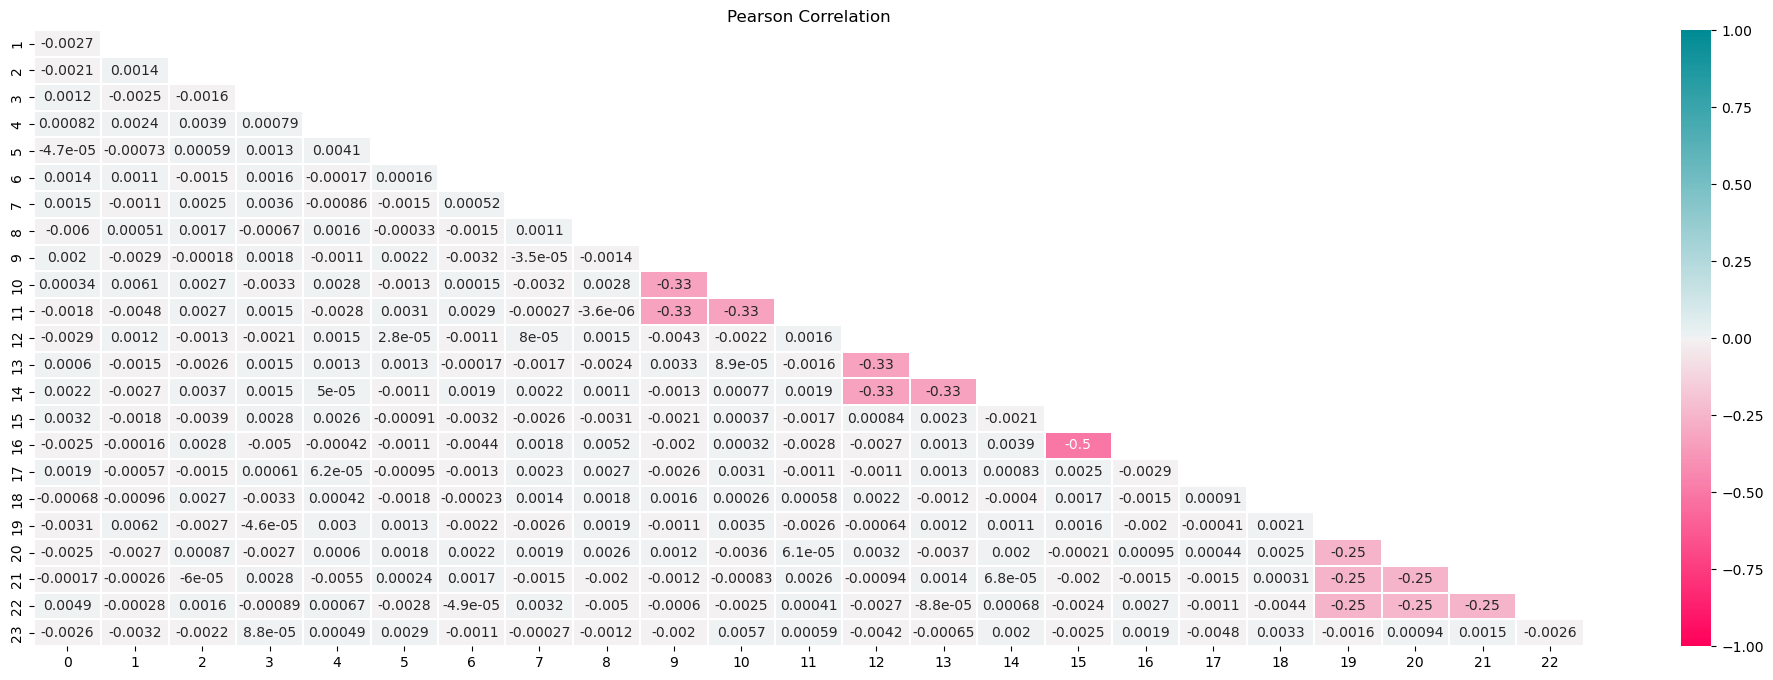

In [22]:
#Build mask for both correlation matrices
#Pearson corr masking
#Generating mask for upper triangle
maskP = np.triu(np.ones_like(pearsonCorr,dtype = bool))

#Adjust mask and correlation
maskP = maskP[1:,:-1]
pCorr = pearsonCorr.iloc[1:,:-1].copy()

#Setting up a diverging palette
cmap = sns.diverging_palette(0,200,150,50,as_cmap=True)
fig = plt.subplots(figsize=(25,8))

sns.heatmap(pCorr, vmin = -1, vmax = 1, cmap = cmap, annot = True, linewidth = 0.3, mask = maskP)
plt.title("Pearson Correlation")

In [23]:
#Check whether any missing values exist by converting X_test to a DataFrame
X_test_df = pd.DataFrame(X_test)
X_test_df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
dtype: int64

In [24]:
#check whether any duplicate entries exist
X_test_df.duplicated().any()

False

In [25]:
#Check duplicate rows
duplicate_rows = X_test_df[X_test_df.duplicated()]
print("Number of duplicate rows : ", duplicate_rows.shape)

#Remove duplicate row
data = X_test_df.drop_duplicates()
duplicate_rows = X_test_df[X_test_df.duplicated()]
print("Number of duplicate rows : ", duplicate_rows.shape)

Number of duplicate rows :  (0, 24)
Number of duplicate rows :  (0, 24)


# Creation of Models
1. kNN
2. Logistic Regression
3. SVM
4. Decision Trees
5. Random Forest
6. Naive Bayes
7. neural Networks

The best value of k is: 27


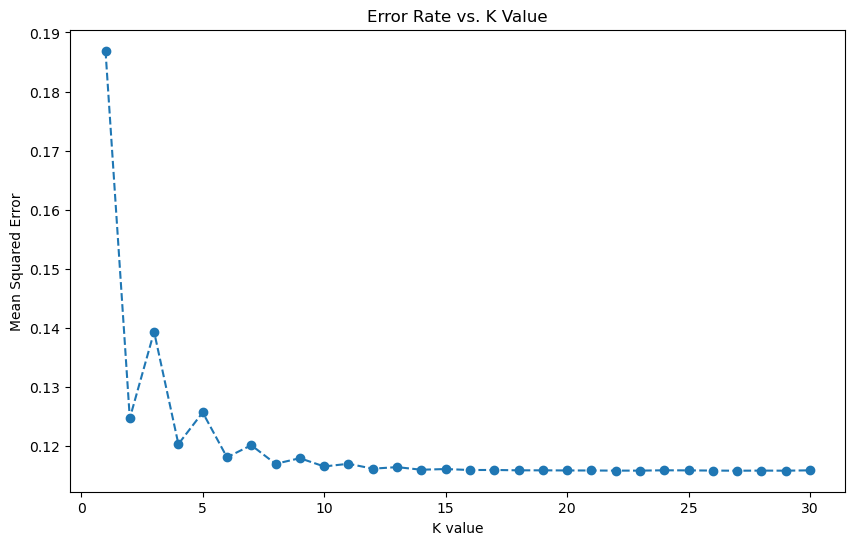


Classification report of test set:
 
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     45297
           1       0.55      0.00      0.00      6025

    accuracy                           0.88     51322
   macro avg       0.72      0.50      0.47     51322
weighted avg       0.84      0.88      0.83     51322


Classification report of validation set:
 
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     22361
           1       0.89      0.00      0.01      2916

    accuracy                           0.88     25277
   macro avg       0.89      0.50      0.47     25277
weighted avg       0.89      0.88      0.83     25277


kNN confusion matrix:

[[45288     9]
 [ 6014    11]]


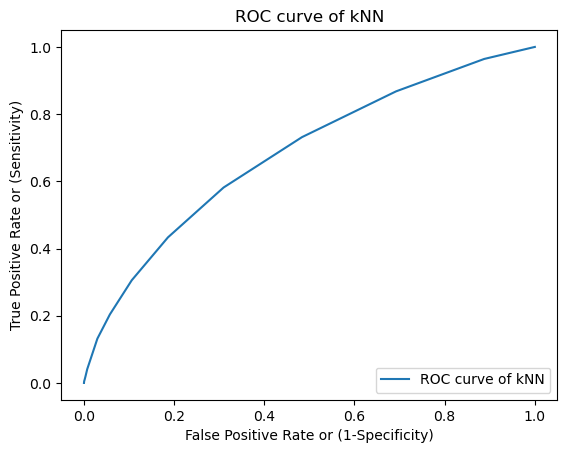

In [26]:
#Cross-validation for K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

neighbors=list(range(1,31))
cv_scores=[]

for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5,scoring='accuracy')
    cv_scores.append(scores.mean())

mse=[1-x for x in cv_scores]
best_k=neighbors[mse.index(min(mse))]
print(f"The best value of k is: {best_k}")

#Plotting graph using error rate vs K value
plt.figure(figsize=(10,6))
plt.plot(neighbors,mse,marker='o',linestyle='dashed')
plt.xlabel('K value')
plt.ylabel('Mean Squared Error')
plt.title('Error Rate vs. K Value')
plt.show()

#Train kNN using the test set and validation set
knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)
y_pred_test=knn.predict(X_test)
y_pred_val=knn.predict(X_val)

print("\nClassification report of test set:\n ")
print(classification_report(y_test, y_pred_test))

print("\nClassification report of validation set:\n ")
print(classification_report(y_val, y_pred_val))

# Confusion matrix of kNN
print("\nkNN confusion matrix:\n")
cm_kNN = confusion_matrix(y_test, y_pred_test)
print(cm_kNN)

# ROC curve of kNN
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
plt.plot(fpr1, tpr1, label='ROC curve of kNN')
plt.xlabel('False Positive Rate or (1-Specificity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('ROC curve of kNN')
plt.legend(loc="lower right")
plt.show()

Model without using GridSearchCV
Classification report of validation set
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     22361
           1       0.61      0.03      0.06      2916

    accuracy                           0.89     25277
   macro avg       0.75      0.52      0.50     25277
weighted avg       0.86      0.89      0.84     25277

Classification report of test set
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45297
           1       0.61      0.04      0.07      6025

    accuracy                           0.88     51322
   macro avg       0.75      0.52      0.50     51322
weighted avg       0.85      0.88      0.84     51322

Model with GridSearchCV
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameter after tuning:
  {'C': 1, 'solver': 'liblinear'}
Classification report of validation set
               precision    recall  f1-score   sup

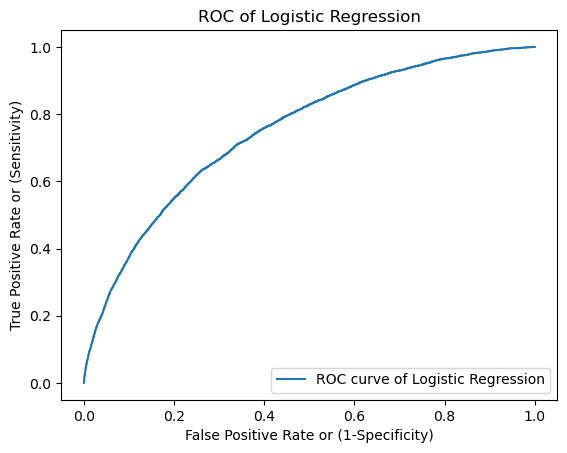

In [27]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Train a logistic regression classifier without using GridSearchCV
print("Model without using GridSearchCV")
logReg= LogisticRegression(random_state=0, solver='liblinear')
logReg.fit(X_train, y_train)

# Check classification report of Logistic regression on validation set
val_pred_logReg = logReg.predict(X_val)
print("Classification report of validation set\n",classification_report (y_val, val_pred_logReg))

# Check classification report of Logistic regression on testing set
y_pred_logReg = logReg.predict(X_test)
print("Classification report of test set\n", classification_report (y_test, y_pred_logReg))



# Train a logistic regression classifier using GridSearch CV
print("Model with GridSearchCV")
param_grid = {'C': [0.1, 1, 10, 100],  # Regularization parameter
              'solver': ['liblinear']}  # Solver parameter
grid_logReg = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3,n_jobs=-1)
grid_logReg.fit(X_train, y_train)
print("Best parameter after tuning:\n ", grid_logReg.best_params_)# print best parameter after tuning

# Check classification report of Logistic regression on validation set using GridSearchCV
grid_val_pred = grid_logReg.predict(X_val)
print("Classification report of validation set\n",classification_report(y_val, grid_val_pred))

# Check classification report of Logistic regression on testing set using GridSearchCV
grid_y_pred = grid_logReg.predict(X_test)
print("Classification report of test set\n",classification_report(y_test, grid_y_pred))

# Confusion matrix of Logistic regression without using GridSearchCV
print("\nLogistic regression confusion matrix:\n")
cm_logReg = confusion_matrix(y_test, y_pred_logReg)
print(cm_logReg)

# Confusion matrix of Logistic regression with the use of GridSearchCV
print("\nLogistic regression matrix after using GridSearchCV:\n")
cm_tuned_logReg = confusion_matrix(y_test, grid_y_pred)
print(cm_tuned_logReg)

# ROC curve of Logistic Regression
fpr2, tpr2, thresholds2 = roc_curve(y_test, logReg.predict_proba(X_test)[:,1])
plt.plot(fpr2, tpr2, label='ROC curve of Logistic Regression')
plt.xlabel('False Positive Rate or (1-Specificity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('ROC of Logistic Regression')
plt.legend(loc="lower right")
plt.show()


Classification report of validation set
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     22361
           1       1.00      0.00      0.00      2916

    accuracy                           0.88     25277
   macro avg       0.94      0.50      0.47     25277
weighted avg       0.90      0.88      0.83     25277


Classification report of test set
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     45297
           1       1.00      0.00      0.00      6025

    accuracy                           0.88     51322
   macro avg       0.94      0.50      0.47     51322
weighted avg       0.90      0.88      0.83     51322


Confusion matrix of SVM with linear kernel function:

[[45297     0]
 [ 6025     0]]


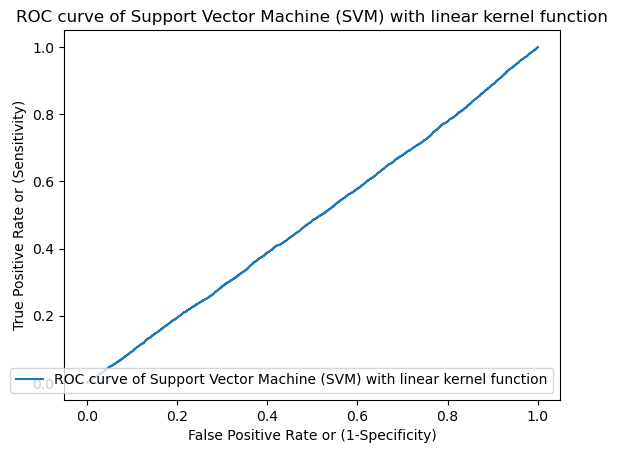

In [28]:
# Support Vector Machine (SVM) with linear kernel function
from sklearn.svm import SVC
svm_ln = SVC(kernel='linear', probability=True, random_state=42) # set probability=True in order to call predict_proba()
svm_ln.fit(X_train, y_train)

# Classification report of SVM on validation set
val_pred_model_SVM_ln = svm_ln.predict(X_val)
print("\nClassification report of validation set\n",classification_report (y_val, val_pred_model_SVM_ln, zero_division=1))

# Classification report of SVM on testing set
y_pred_model_SVM_ln = svm_ln.predict(X_test)
print("\nClassification report of test set\n", classification_report (y_test, y_pred_model_SVM_ln, zero_division=1))

# Confusion matrix of SVM
print("\nConfusion matrix of SVM with linear kernel function:\n")
cm_model_SVM_ln = confusion_matrix(y_test, y_pred_model_SVM_ln)
print(cm_model_SVM_ln)

# ROC curve of SVM
fpr3a, tpr3a, thresholds3a = roc_curve(y_test, svm_ln.predict_proba(X_test)[:,1])
plt.plot(fpr3a, tpr3a, label='ROC curve of Support Vector Machine (SVM) with linear kernel function')
plt.xlabel('False Positive Rate or (1-Specificity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('ROC curve of Support Vector Machine (SVM) with linear kernel function')
plt.legend(loc="lower right")
plt.show()


Classification report of validation set
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     22361
           1       1.00      0.00      0.00      2916

    accuracy                           0.88     25277
   macro avg       0.94      0.50      0.47     25277
weighted avg       0.90      0.88      0.83     25277


Classification report of test set
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     45297
           1       1.00      0.00      0.00      6025

    accuracy                           0.88     51322
   macro avg       0.94      0.50      0.47     51322
weighted avg       0.90      0.88      0.83     51322


Confusion matrix of SVM with rbf kernel function:

[[45297     0]
 [ 6025     0]]


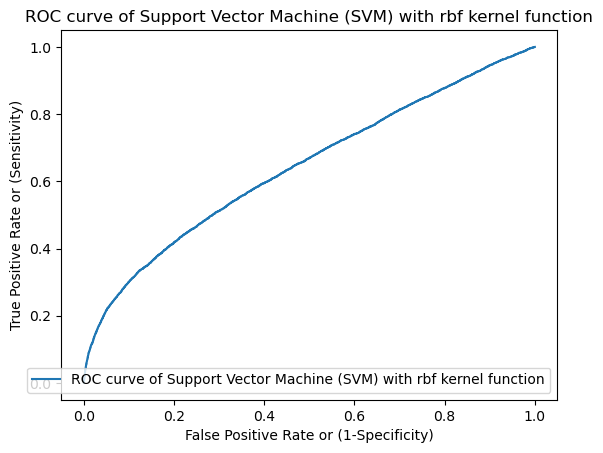

In [29]:
# Support Vector Machine (SVM) with rbf kernel function
from sklearn.svm import SVC
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

# Classification report of SVM on validation set
val_pred_model_SVM_rbf = svm_rbf.predict(X_val)
print("\nClassification report of validation set\n",classification_report (y_val, val_pred_model_SVM_rbf, zero_division=1))

# Classification report of SVM on testing set
y_pred_model_SVM_rbf = svm_rbf.predict(X_test)
print("\nClassification report of test set\n", classification_report (y_test, y_pred_model_SVM_rbf, zero_division=1))

# Confusion matrix of SVM
print("\nConfusion matrix of SVM with rbf kernel function:\n")
cm_model_SVM_rbf = confusion_matrix(y_test, y_pred_model_SVM_rbf)
print(cm_model_SVM_rbf)

# Get decision function scores
y_score_model_SVM_rbf = svm_rbf.decision_function(X_test)

# ROC curve of SVM
fpr3b, tpr3b, thresholds3b= roc_curve(y_test, y_score_model_SVM_rbf)
plt.plot(fpr3b, tpr3b, label='ROC curve of Support Vector Machine (SVM) with rbf kernel function')
plt.xlabel('False Positive Rate or (1-Specificity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('ROC curve of Support Vector Machine (SVM) with rbf kernel function')
plt.legend(loc="lower right")
plt.show()


Classification report of validation set
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     22361
           1       1.00      0.00      0.00      2916

    accuracy                           0.88     25277
   macro avg       0.94      0.50      0.47     25277
weighted avg       0.90      0.88      0.83     25277


Classification report of test set
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     45297
           1       1.00      0.00      0.00      6025

    accuracy                           0.88     51322
   macro avg       0.94      0.50      0.47     51322
weighted avg       0.90      0.88      0.83     51322


Confusion matrix of SVM with poly kernel function:

[[45297     0]
 [ 6025     0]]


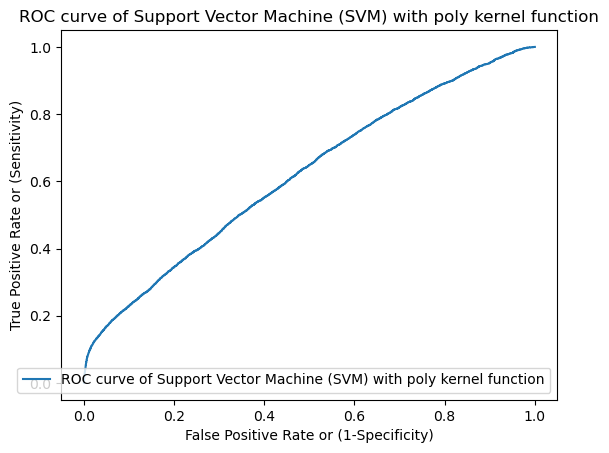

In [30]:
# Support Vector Machine (SVM) with poly kernel function
from sklearn.svm import SVC
svm_poly = SVC(kernel='poly', degree=3, gamma='scale', probability=True, random_state=42)
svm_poly.fit(X_train, y_train)

# Classification report of SVM on validation set
val_pred_model_SVM_poly = svm_poly.predict(X_val)
print("\nClassification report of validation set\n",classification_report (y_val, val_pred_model_SVM_poly, zero_division=1))

# Classification report of SVM on testing set
y_pred_model_SVM_poly = svm_poly.predict(X_test)
print("\nClassification report of test set\n", classification_report (y_test, y_pred_model_SVM_poly, zero_division=1))

# Confusion matrix of SVM
print("\nConfusion matrix of SVM with poly kernel function:\n")
cm_model_SVM_poly = confusion_matrix(y_test, y_pred_model_SVM_poly)
print(cm_model_SVM_poly)

# ROC curve of SVM
fpr3c, tpr3c, thresholds3c = roc_curve(y_test, svm_poly.predict_proba(X_test)[:, 1])
plt.plot(fpr3c, tpr3c, label='ROC curve of Support Vector Machine (SVM) with poly kernel function')
plt.xlabel('False Positive Rate or (1-Specificity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('ROC curve of Support Vector Machine (SVM) with poly kernel function')
plt.legend(loc="lower right")
plt.show()


Classification report of validation set
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     22361
           1       0.21      0.20      0.21      2916

    accuracy                           0.82     25277
   macro avg       0.55      0.55      0.55     25277
weighted avg       0.82      0.82      0.82     25277


Classification report of test set
               precision    recall  f1-score   support

           0       0.89      0.90      0.90     45297
           1       0.21      0.20      0.20      6025

    accuracy                           0.82     51322
   macro avg       0.55      0.55      0.55     51322
weighted avg       0.81      0.82      0.81     51322


Confusion matrix of SVM with sigmoid kernel function:

[[40690  4607]
 [ 4816  1209]]


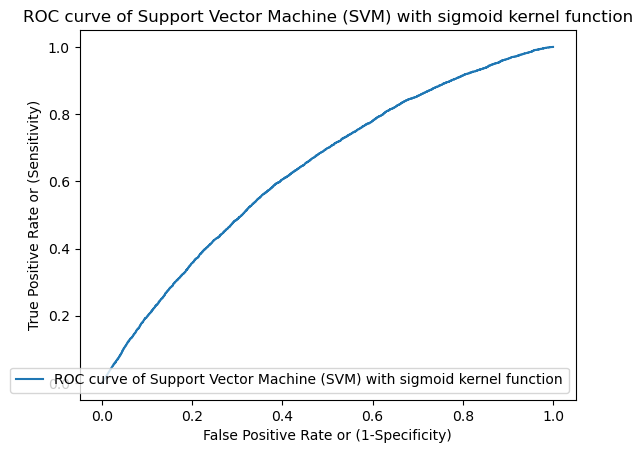

In [31]:
# Support Vector Machine (SVM) with sigmoid kernel function
from sklearn.svm import SVC
svm_sigmoid = SVC(kernel='sigmoid', gamma='scale', random_state=42)
svm_sigmoid.fit(X_train, y_train)

# Classification report of SVM on validation set
val_pred_model_SVM_sigmoid = svm_sigmoid.predict(X_val)
print("\nClassification report of validation set\n",classification_report (y_val, val_pred_model_SVM_sigmoid, zero_division=1))

# Classification report of SVM on testing set
y_pred_model_SVM_sigmoid = svm_sigmoid.predict(X_test)
print("\nClassification report of test set\n", classification_report (y_test, y_pred_model_SVM_sigmoid, zero_division=1))

# Confusion matrix of SVM
print("\nConfusion matrix of SVM with sigmoid kernel function:\n")
cm_model_SVM_sigmoid = confusion_matrix(y_test, y_pred_model_SVM_sigmoid)
print(cm_model_SVM_sigmoid)

# Get decision function scores
y_score_model_SVM_sigmoid = svm_sigmoid.decision_function(X_test)

# Transform scores into probabilities using the logistic function
from scipy.special import expit
y_prob_model_SVM_sigmoid = expit(y_score_model_SVM_sigmoid)

# ROC curve of SVM
fpr3d, tpr3d, thresholds3d= roc_curve(y_test, y_prob_model_SVM_sigmoid)
plt.plot(fpr3d, tpr3d, label='ROC curve of Support Vector Machine (SVM) with sigmoid kernel function')
plt.xlabel('False Positive Rate or (1-Specificity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('ROC curve of Support Vector Machine (SVM) with sigmoid kernel function')
plt.legend(loc="lower right")
plt.show()

Model without GridSearchCV

Classification report of validation set
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     22361
           1       0.56      0.02      0.04      2916

    accuracy                           0.89     25277
   macro avg       0.72      0.51      0.49     25277
weighted avg       0.85      0.89      0.84     25277


Classification report of test set
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     45297
           1       0.62      0.02      0.04      6025

    accuracy                           0.88     51322
   macro avg       0.75      0.51      0.49     51322
weighted avg       0.85      0.88      0.83     51322

Model with GridSearchCV

Best parameter after tuning:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

Classification report of validation set
               precision    recall  f1-score   support

 

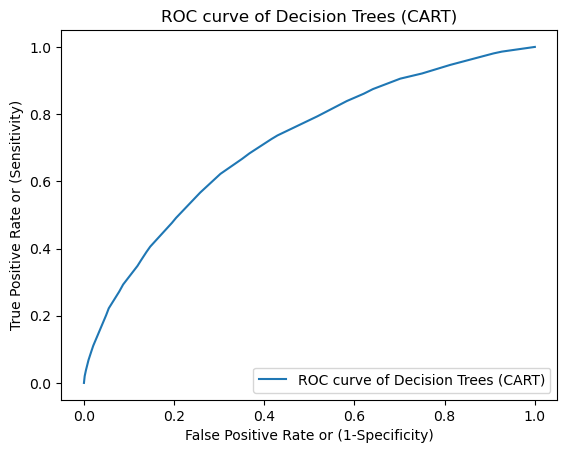

In [32]:
# Decision Trees (CART)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Decision Trees (CART) without GridSearchCV
print("Model without GridSearchCV")
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dt.fit(X_train, y_train)

# Classification report of Decision Trees (CART) on validation set
val_pred_model_dt = dt.predict(X_val)
print("\nClassification report of validation set\n", classification_report(y_val, val_pred_model_dt))

# Classification report of Decision Trees (CART) on testing set
y_pred_model_dt = dt.predict(X_test)
print("\nClassification report of test set\n", classification_report(y_test, y_pred_model_dt))

# Train the model on training set with GridSearchCV
print("Model with GridSearchCV")
param_grid_model_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }
grid_model_dt = GridSearchCV(dt, param_grid_model_dt, cv=5, n_jobs=-1)
grid_model_dt.fit(X_train, y_train)
print("\nBest parameter after tuning: ", grid_model_dt.best_params_)

# Classification report of Decision Trees (CART) on validation set with GridSearchCV
grid_val_pred_model_dt = grid_model_dt.predict(X_val)
print("\nClassification report of validation set\n",classification_report(y_val, grid_val_pred_model_dt))

# Classification report of Decision Trees (CART) on testing set with GridSearchCV
grid_y_pred_model_dt = grid_model_dt.predict(X_test)
print("\nClassification report of test set\n",classification_report(y_test, grid_y_pred_model_dt))

# Confusion matrix of Decision Trees (CART) without GridSearchCV
print("\nDecision Tree confusion matrix:\n")
cm_dt = confusion_matrix(y_test, y_pred_model_dt)
print(cm_dt)

# Confusion matrix of Decision Trees (CART) with GridSearchCV
print("\nDecision Tree confusion matrix after using GridSearchCV:\n")
cm_grid_model_dt = confusion_matrix(y_test, grid_y_pred_model_dt)
print(cm_grid_model_dt)

# ROC curve of Decision Trees (CART)
from sklearn.metrics import roc_curve
fpr4, tpr4, thresholds4= roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.plot(fpr4, tpr4, label='ROC curve of Decision Trees (CART)')
plt.xlabel('False Positive Rate or (1-Specificity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('ROC curve of Decision Trees (CART)')
plt.legend(loc="lower right")
plt.show()

Model without RandomizedSearchCV

Classification report of validation set
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     22361
           1       0.69      0.03      0.06      2916

    accuracy                           0.89     25277
   macro avg       0.79      0.52      0.50     25277
weighted avg       0.86      0.89      0.84     25277


Classification report of test set
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45297
           1       0.71      0.03      0.06      6025

    accuracy                           0.88     51322
   macro avg       0.80      0.51      0.50     51322
weighted avg       0.86      0.88      0.83     51322

Model with RandomizedSearchCV
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best parameter after tuning:  {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_

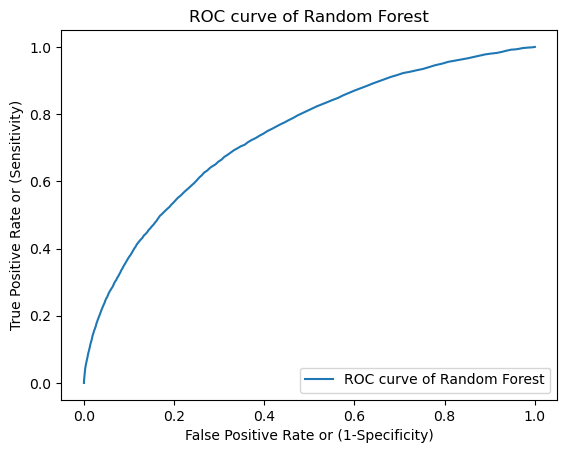

In [33]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Random Forest without RandomizedSearchCV
print("Model without RandomizedSearchCV")
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train)

# Classification report of Random Forest on validation set
val_pred_model_rf = rf.predict(X_val)
print("\nClassification report of validation set\n", classification_report(y_val, val_pred_model_rf))

# Classification report of Random Forest on testing set
y_pred_model_rf = rf.predict(X_test)
print("\nClassification report of test set\n", classification_report(y_test, y_pred_model_rf))

# Train the model on training set with RandomizedSearchCV
print("Model with RandomizedSearchCV")
param_rand_model_rf = {
        'n_estimators': [100, 200, 300],
        'max_features': ['sqrt'],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': randint(2, 11),
        'min_samples_leaf': randint(1, 11),
        'bootstrap': [True, False]
    }
rand_model_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_rand_model_rf, n_iter=20, cv=3, verbose=2, random_state=42, n_jobs=2)
rand_model_rf.fit(X_train, y_train)
print("\nBest parameter after tuning: ", rand_model_rf.best_params_)

# Classification report of Random Forest on validation set with RandomizedSearchCV
rand_val_pred_model_rf = rand_model_rf.predict(X_val)
print("\nClassification report of validation set\n",classification_report(y_val, rand_val_pred_model_rf))

# Classification report of Random Forest on testing set with RandomizedSearchCV
rand_y_pred_model_rf = rand_model_rf.predict(X_test)
print("\nClassification report of test set\n",classification_report(y_test, rand_y_pred_model_rf))

# Confusion matrix of Random Forest
print("\nRandom Forest confusion matrix:\n")
cm_rf = confusion_matrix(y_test, y_pred_model_rf)
print(cm_rf)

# Confusion matrix of Random Forest with RandomizedSearchCV
print("\nRandom Forest confusion matrix after using RandomizedSearchCV:\n")
cm_rand_model_rf = confusion_matrix(y_test, rand_y_pred_model_rf)
print(cm_rand_model_rf)

# ROC curve of Random Forest
fpr5, tpr5, thresholds5 = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr5, tpr5, label='ROC curve of Random Forest')
plt.xlabel('False Positive Rate or (1-Specificity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('ROC curve of Random Forest')
plt.legend(loc="lower right")
plt.show()

Classification report of validation set
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     22361
           1       0.62      0.03      0.05      2916

    accuracy                           0.89     25277
   macro avg       0.75      0.51      0.49     25277
weighted avg       0.86      0.89      0.84     25277

Classification report of test set
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45297
           1       0.63      0.03      0.06      6025

    accuracy                           0.88     51322
   macro avg       0.76      0.51      0.50     51322
weighted avg       0.86      0.88      0.83     51322


Naive Bayes confusion matrix:

[[45195   102]
 [ 5851   174]]


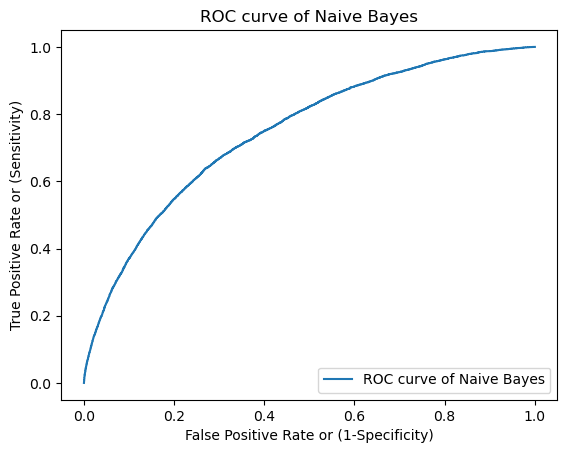

In [34]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score

# Train a Naive Bayes classifier
model_NB = GaussianNB()
model_NB.fit(X_train,y_train)

# Check classification report of Naive Bayes on validation set
val_pred_model_NB = model_NB.predict(X_val)
print("Classification report of validation set\n",classification_report (y_val, val_pred_model_NB))

# Check classification report of Naive Bayes on testing set
y_pred_model_NB = model_NB.predict(X_test)
print("Classification report of test set\n", classification_report (y_test, y_pred_model_NB))

# Confusion matrix of Naive Bayes
print("\nNaive Bayes confusion matrix:\n")
cm_NB = confusion_matrix(y_test, y_pred_model_NB)
print(cm_NB)

#No hyperparameter tuning

fpr6, tpr6, thresholds6 = roc_curve(y_test, model_NB.predict_proba(X_test)[:, 1])
plt.plot(fpr6, tpr6, label='ROC curve of Naive Bayes')
plt.xlabel('False Positive Rate or (1-Specificity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('ROC curve of Naive Bayes')
plt.legend(loc="lower right")
plt.show()


Model without RandomizedSearch CV
Classification report of validation set
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     22361
           1       0.61      0.08      0.14      2916

    accuracy                           0.89     25277
   macro avg       0.75      0.53      0.54     25277
weighted avg       0.86      0.89      0.85     25277

Classification report of test set
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     45297
           1       0.58      0.07      0.13      6025

    accuracy                           0.89     51322
   macro avg       0.73      0.53      0.54     51322
weighted avg       0.85      0.89      0.84     51322

Model with RandomizedSearch CV


c:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Best score:  0.8861398300332581
Best parameter after tuning:  {'max_iter': 50, 'hidden_layer_sizes': 91, 'alpha': 0.01, 'activation': 'relu'}
Classification report of validation set
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     22361
           1       0.60      0.09      0.16      2916

    accuracy                           0.89     25277
   macro avg       0.75      0.54      0.55     25277
weighted avg       0.86      0.89      0.85     25277

Classification report of test set
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     45297
           1       0.57      0.09      0.16      6025

    accuracy                           0.89     51322
   macro avg       0.73      0.54      0.55     51322
weighted avg       0.85      0.89      0.85     51322


Neural network confusion matrix:

[[44973   324]
 [ 5577   448]]

Neural network confusion matrix after using RandomizedSearch 

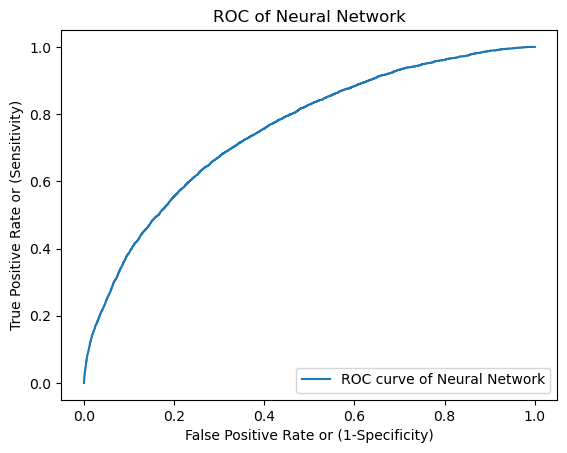

In [35]:
#Neural network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

# Train a Neural Network classifier without using RandomizedSearch CV
print("Model without RandomizedSearch CV")
mlp = MLPClassifier()
mlp.fit(X_train,y_train)

# Check classification report of Neural Network on validation set
y_prob_val = mlp.predict_proba(X_val)[:,1] # Give positive class prediction probabilities
y_pred_val = np.where(y_prob_val > 0.5, 1, 0) # Threshold the probabilities to give class predictions.
print("Classification report of validation set\n", classification_report(y_val, y_pred_val))

# Check classification report of Neural Network on testing set
y_prob_test = mlp.predict_proba(X_test)[:,1]
y_pred_test = np.where(y_prob_test > 0.5, 1, 0)
print("Classification report of test set\n", classification_report(y_test, y_pred_test))

# Train a Neural network classifier using RondomizedSearch CV
print("Model with RandomizedSearch CV")
tuned_parameters={'hidden_layer_sizes': range(1,200,10) ,
                  'activation': ['tanh','logistic','relu'],
                  'alpha':[0.0001,0.001,0.01,0.1,1,10],
                  'max_iter': range(50,200,50)}
model_mlp = RandomizedSearchCV(mlp, tuned_parameters,cv=10,scoring='accuracy',n_iter=5,n_jobs= -1,random_state=5)
model_mlp.fit(X_train, y_train)
print("Best score: ",model_mlp.best_score_)
print("Best parameter after tuning: ",model_mlp.best_params_)# print best parameter after tuning

# Check classification report of Neural network on validation set using RandomizedSearch CV
tuned_prob_val = model_mlp.predict_proba(X_val)[:,1]
tuned_pred_val = np.where(tuned_prob_val > 0.5, 1, 0)
print("Classification report of validation set\n",classification_report(y_val, tuned_pred_val))

# Check classification report of Neural network on testing set using RandomizedSearch CV
tuned_prob_test = model_mlp.predict_proba(X_test)[:,1]
tuned_pred_test = np.where(tuned_prob_test > 0.5, 1, 0)
print("Classification report of test set\n",classification_report(y_test, tuned_pred_test))

# Confusion matrix of Neural Network without using RandomizedSearch CV
print("\nNeural network confusion matrix:\n")
cm_NN = confusion_matrix(y_test, y_pred_test)
print(cm_NN)

# Confusion matrix of Neural network with the use of RandomizedSearch CV
print("\nNeural network confusion matrix after using RandomizedSearch CV:\n")
cm_tuned_NN = confusion_matrix(y_test, tuned_pred_test)
print(cm_tuned_NN)

# ROC curve of Neural Network
fpr7, tpr7, thresholds7 = roc_curve(y_test, tuned_prob_test)
plt.plot(fpr7, tpr7, label='ROC curve of Neural Network')
plt.xlabel('False Positive Rate or (1-Specificity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('ROC of Neural Network')
plt.legend(loc="lower right")
plt.show()


In [38]:
#AUC score
from sklearn.metrics import roc_auc_score,roc_curve
auc_score1 = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, logReg.predict_proba(X_test)[:,1])
auc_score3a = roc_auc_score(y_test, svm_ln.predict_proba(X_test)[:,1])
auc_score3b = roc_auc_score(y_test, y_score_model_SVM_rbf)
auc_score3c = roc_auc_score(y_test, svm_poly.predict_proba(X_test)[:, 1])
auc_score3d = roc_auc_score(y_test, y_prob_model_SVM_sigmoid)
auc_score4 = roc_auc_score(y_test, dt.predict_proba(X_test)[:,1])
auc_score5 = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
auc_score6 = roc_auc_score(y_test, model_NB.predict_proba(X_test)[:, 1])
auc_score7 = roc_auc_score(y_test, tuned_prob_test)

print("AUC score\n")
print("kNN: ", auc_score1) # kNN
print("Logistic Regression: ", auc_score2) # Logistic Regression
print("#SVM with linear kernel function: ", auc_score3a) # SVM with linear kernel function
print("SVM with rbf kernel function: ", auc_score3b) # SVM with rbf kernel function
print("SVM with poly kernel function: ", auc_score3c) # SVM with poly kernel function
print("SVM with sigmoid kernel function: ", auc_score3d) # SVM with sigmoid kernel function
print("Decision tree: ", auc_score4) # Decision tree
print("Random Forest: ", auc_score5) # Random Forest
print("Naive Bayes: ", auc_score6) # Naive Bayes
print("Neural Network: ", auc_score7) # Neural Network


AUC score

kNN:  0.6817271567818375
Logistic Regression:  0.7507091755959767
#SVM with linear kernel function:  0.4861901491648893
SVM with rbf kernel function:  0.6425554274018311
SVM with poly kernel function:  0.6183075079303704
SVM with sigmoid kernel function:  0.6378868027954184
Decision tree:  0.713224878091365
Random Forest:  0.7413701016353386
Naive Bayes:  0.7472501499325293
Neural Network:  0.7527278779786009


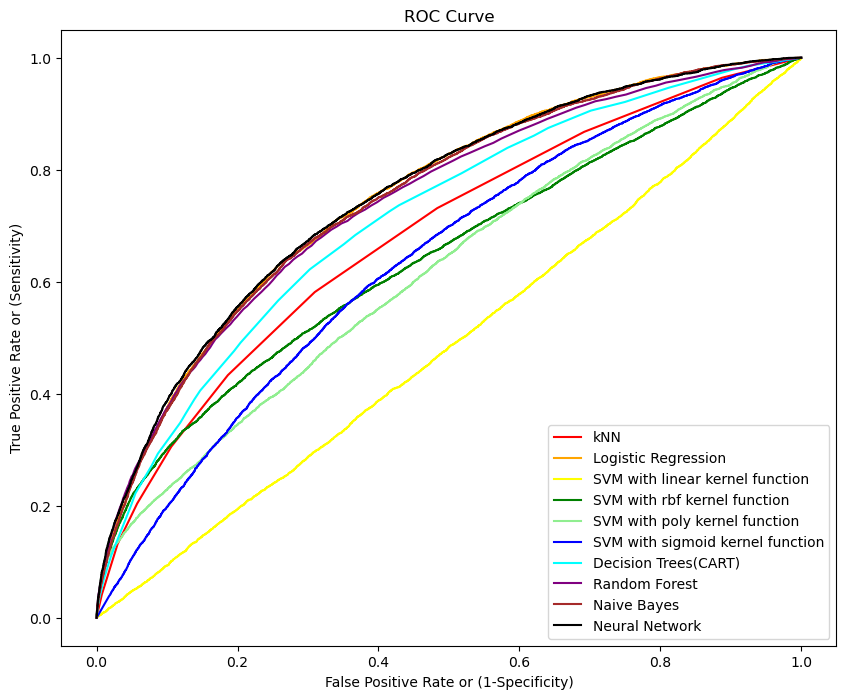

<Figure size 640x480 with 0 Axes>

In [42]:
# ROC curve
plt.figure(figsize=(10, 8))
fpr1, tpr1, thresholds1 = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, logReg.predict_proba(X_test)[:,1])
fpr3a, tpr3a, thresholds3a = roc_curve(y_test, svm_ln.predict_proba(X_test)[:,1])
fpr3b, tpr3b, thresholds3b= roc_curve(y_test, y_score_model_SVM_rbf)
fpr3c, tpr3c, thresholds3c = roc_curve(y_test, svm_poly.predict_proba(X_test)[:, 1])
fpr3d, tpr3d, thresholds3d= roc_curve(y_test, y_prob_model_SVM_sigmoid)
fpr4, tpr4, thresholds4= roc_curve(y_test, dt.predict_proba(X_test)[:,1])
fpr5, tpr5, thresholds5 = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
fpr6, tpr6, thresholds6 = roc_curve(y_test, model_NB.predict_proba(X_test)[:, 1])
fpr7, tpr7, thresholds7 = roc_curve(y_test, tuned_prob_test)

plt.plot(fpr1, tpr1, color='red', label='kNN')#kNN
plt.plot(fpr2, tpr2, color='orange', label='Logistic Regression') #Logistic Regression
plt.plot(fpr3a, tpr3a, color='yellow', label='SVM with linear kernel function') #SVM with linear kernel function
plt.plot(fpr3b, tpr3b, color='green', label='SVM with rbf kernel function') #SVM with rbf kernel function
plt.plot(fpr3c, tpr3c, color='lightgreen', label='SVM with poly kernel function') #SVM with poly kernel function
plt.plot(fpr3d, tpr3d, color='blue', label='SVM with sigmoid kernel function') #SVM with sigmoid kernel function
plt.plot(fpr4, tpr4, color='cyan', label='Decision Trees(CART)') #Decision Trees
plt.plot(fpr5, tpr5, color='purple', label='Random Forest') #Random forest
plt.plot(fpr6, tpr6, color='brown',label='Naive Bayes') #Naive Bayes
plt.plot(fpr7, tpr7, color='black', label='Neural Network') #Neural Network
plt.xlabel('False Positive Rate or (1-Specificity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

plt.savefig('ROC_curve.png')

# New Dataset Prediction

In [27]:
#Data preparation for the new dataset
#Read the new dataset
new_data = pd.read_csv('NewApplicants.csv')

#Data preprocessing
#delete unused column
new_data.drop(['LoanID'], axis = 1 ,inplace = True)

#Separate the data into features(X) and target(y)
X_new = new_data.drop('Default', axis=1)
y_new = new_data['Default']

#Handle categorical data
categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
categorical_data = pd.get_dummies(new_data[categorical_columns], drop_first=True)

#Drop extra columns
X_new = X_new.drop(categorical_columns, axis=1)

#Concatenation of independent variables and new categorical variables
X_new = pd.concat([X_new, categorical_data], axis=1)
print(X_new)

#Check whether any missing values exist
print("Missing value: \n",new_data.isnull().sum())

#check whether any duplicate entries exist
print("Duplicate entries: ",new_data.duplicated().any())

#Check duplicate rows
duplicate_rows = new_data[new_data.duplicated()]
print("Number of duplicate rows : ", duplicate_rows.shape)

#Remove duplicate row
data = new_data.drop_duplicates()
duplicate_rows = new_data[new_data.duplicated()]
print("Number of duplicate rows : ", duplicate_rows.shape)

    Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0    56   85994       50587          520              80               4   
1    69   50432      124440          458              15               1   
2    46   84208      129188          451              26               3   
3    32   31713       44799          743               0               3   
4    60   20437        9139          633               8               4   
5    25   90298       90448          720              18               2   
6    38  111188      177025          429              80               1   
7    56  126802      155511          531              67               4   
8    36   42053       92357          827              83               1   
9    40  132784      228510          480             114               4   
10   64   73743      140354          300               0               2   
11   68   21711      168231          352              78               2   
12   51   69

In [28]:
#Predict using Neural Network
from sklearn.neural_network import MLPClassifier

# Define the fixed hyperparameters that obtained as best parameters
fixed_parameters = {
    'max_iter': 50,
    'hidden_layer_sizes': 91,
    'alpha': 0.01,
    'activation': 'relu'
}

model_mlp = MLPClassifier(**fixed_parameters) # Instantiate the MLPClassifier with fixed hyperparameters
model_mlp.fit(X_train, y_train)

# Make predictions on the new dataset 
new_predict = model_mlp.predict(X_new)
new_prob = model_mlp.predict_proba(X_new)[:, 1]

print("Predictions on the new dataset:\n", new_predict)
print("Probability scores on the new dataset:\n", new_prob)


Predictions on the new dataset:
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0]
Probability scores on the new dataset:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]


c:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
